# Blur Detection
Is my image blurred ? 

In [2]:
(ns wealthy-darkness
 (:require
     [opencv4.core :refer :all]
     [opencv4.colors.rgb :as color]
     [opencv4.utils :as u]))

nil

## laplacian variation

- https://stackoverflow.com/questions/36413394/opencv-variation-of-the-laplacian-java
- http://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

Detect blur in an image

In [3]:

(def img
  (-> "resources/images/cat.jpg" imread))

(def kernel
  (u/matrix-to-mat
  [ [0 -1 0]
    [-1 4 -1]
    [0 -1 0]]))


#'wealthy-darkness/kernel

In [4]:

(def result (-> img clone (cvt-color! COLOR_BGR2GRAY)))
(filter-2-d! img -1 kernel)
(def std (new-matofdouble))
(def median (new-matofdouble))
(mean-std-dev img median std)

(Math/pow (first (.get std 0 0)) 2)

60.04290529687066

In [5]:
;
; implementation using a function
;

(def laplacian-kernel (u/matrix-to-mat
[ [0 -1 0]
  [-1 4 -1]
  [0 -1 0]]))

(defn std-laplacian [img]
  (let [ std (new-matofdouble)]
    (filter-2-d! img -1 laplacian-kernel)
    (mean-std-dev img (new-matofdouble) std)
    (Math/pow (first (.get std 0 0)) 2)))

(defn is-image-blurred?[img]
  (< (std-laplacian (clone img)) 100))

(defn mark-blurred! [ _img ]
  (let [ _text   (if (is-image-blurred? _img) "BLUR" "STILL") ]
    (put-text _img _text (new-point 30 30) FONT_ITALIC 1.0 color/blue-2 2)	
  _img))

#'wealthy-darkness/mark-blurred!

In [7]:
(def images ["resources/images/tiger-blur.gif" "resources/blurred/blurred_cat.jpg" "resources/nico.jpg"])
(defn mark [image]
    (-> image imread (u/resize-by 0.5) mark-blurred! u/>>>))

#'wealthy-darkness/mark

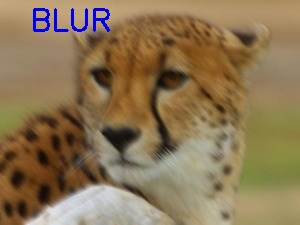

In [11]:
(mark (nth images 0))

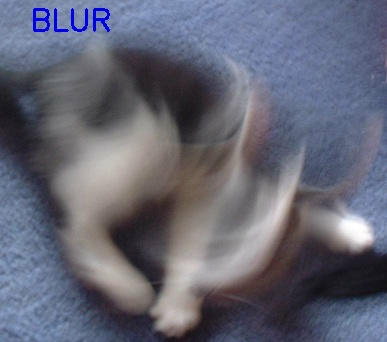

In [12]:
(mark (nth images 1))

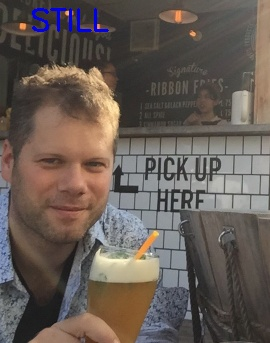

In [13]:
(mark (nth images 2))